Decision trees are supervised learning algorithms used for both, classification and regression tasks .

Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have continuous but also categorical input and target features. The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible

The descriptive feature which leaves the target feature most purely is said to be the most informative one. This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called leaf nodes.

The leaf nodes contain the predictions we will make for new query instances presented to our trained model. This is possible since the model has kind of learned the underlying structure of the training data and hence can, given some assumptions, make predictions about the target feature value (class) of unseen query instances.
A decision tree mainly contains of a root node, interior nodes, and leaf nodes which are then connected by branches.

In simplified terms, the process of training a decision tree and predicting the target features of query instances is as follows:

1. Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature

2. Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process

3. Grow the tree until we accomplish a stopping criteria --> create leaf nodes which represent the predictions we want to make for new query instances

4. Show query instances to the tree and run down the tree until we arrive at leaf nodes

5. DONE

In principal decision trees can be used to predict the target feature of a unknown query instance by building a model based on existing data for which the target feature values are known (supervised learning). Additionally, we know that this model can make predictions for unknown query instances because it models the relationship between the known descriptive features and the know target feature. In our following example, the tree model learns "how a specific animal species looks like" respectively the combination of descriptive feature values distinctive for animal species.
Additionally, we know that to train a decision tree model we need a dataset consisting of a number of training examples characterized by a number of descriptive features and a target feature.

We want, given a dataset, train a model which kind of learns the relationship between the descriptive features and a target feature such that we can present the model a new, unseen set of query instances and predict the target feature values for these query instances. Lets further recapitulate the general shape of a decision tree. We know that we have at the bottom of the tree leaf nodes which contain (in the optimal case) target feature values. 

In the example the animals are classified as being Mammals or Reptiles based on whether they are toothed, have legs and do breath. The dataset looks like:

In [10]:
import pandas as pd
data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])
features = data[["toothed","hair","breathes","legs"]]
target = data["species"]
data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


Here each leaf node should (in the best case) only contain "Mammals" or "Reptiles". The task for us is now to find the best "way" to split the dataset such that this can be achieved.To split means consider the dataset above and think about what must be done to split the dataset into a Dataset 1 containing as target feature values (species) only Mammals and a Dataset 2, containing only Reptiles.To achieve that, in this simplified example, we only need the descriptive feature hair since if hair is TRUE, the associated species is always a Mammal. Hence in this case our tree model would look like: 

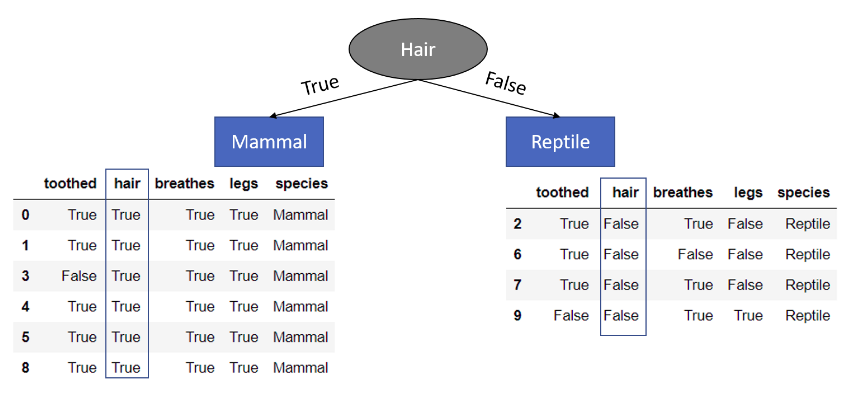


That is, we have split our dataset by asking the question if the animal has hair or not. And exactly this asking and therewith splitting is the key to the decision tree models. Now in that case the splitting has been very easy because we only have a small number of descriptive features and the dataset is completely separable along the values of only one descriptive feature. However, most of the time datasets are not that easily separable and we must split the dataset more than one time ("ask more than one question"). Here, the next question directly arises: Given that we have to split the dataset more than one time, that is, ask more then one question to separate the dataset, Which is the descriptive feature we should start with (root node) and in which order should we ask questions (build the interior nodes) that is, use descriptive features to split the dataset on? Well, we have seen that using the hair descriptive feature seems to occupy the most information about the target feature since we only need this feature to perfectly split the dataset. Hence it would be useful to measure the "informativeness" of the features and use the feature with the most "informativeness" as the feature which should be used to split the data on. From now on, we use the term information gain as a measure of "informativeness" of a feature. In the following section we will introduce some mathematical terms and derive how the information gain is calculated as well as how we can build a tree model based on that. 


Information gain is a measure of how good a descriptive feature is suited to split a dataset on. To be able to calculate the information gain, we need to first calculate entropy of a dataset. The entropy of a dataset is used to measure the impurity of a dataset and we will use this kind of informativeness measure in our calculations. There are also other types of measures which can be used to calculate the information gain. The most prominent ones are the: Gini Index, Chi-Square, Information gain ratio, Variance.

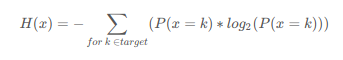


Our dataset has two target feature values in its target feature value space {Mammal, Reptile}. Where P(x=Mammal)=0.6 and P(x=Reptile)=0.4 Hence the entropy of our dataset regarding the target feature is calculated with:

H(x)=−((0.6∗log2(0.6))+(0.4∗log2(0.4)))=0.971

We have now determined the total impurity/purity (≈ entropy) of our dataset which equals to approximately 0.971. Now our task is to find the best feature in terms of information gain (Remember that we want to find the feature which splits the data most accurate along the target feature values) which we should use to first split our data on (which serves as root node). Remember that the hair feature is no longer part of our feature set.

Following this, how can we check which of the descriptive features most accurately splits the dataset, that is, remains the dataset with the lowest impurity ≈ entropy or in other words best classifies the target features by its own? Well, we use each descriptive feature and split the dataset along the values of these descriptive feature and then calculate the entropy of the dataset once we have split the data along the feature values. This gives us the remaining entropy after we have split the dataset along the feature values. Next, we subtract this value from the originally calculated entropy of the dataset to see how much this feature splitting reduces the original entropy. The information gain of a feature is calculated with:

InfoGain(featured)=Entropy(D)−Entropy(featured)


So the only thing we have to do is to split the dataset along the values of each feature and then treat these sub sets as if they were our "original" dataset in terms of entropy calculation. The formula for the Information Gain calculation per feature is:


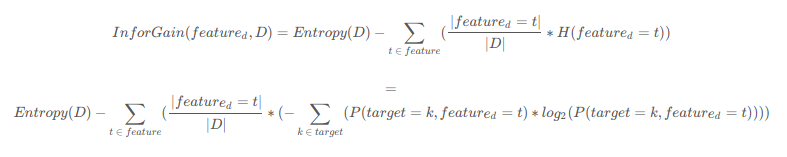


Summarized, for each descriptive feature, we sum up the resulting entropies for splitting the dataset along the feature values and additionally weight the feature value entropies by their occurrence probability. 



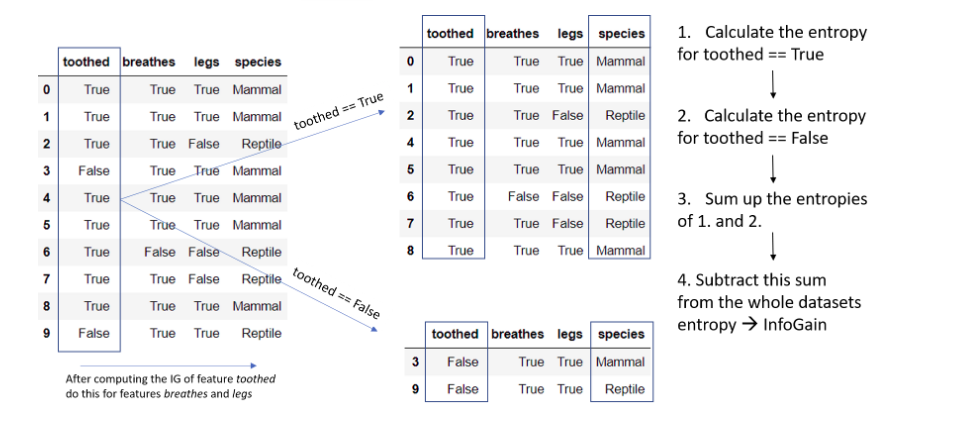

Now we will calcuate the Information gain for each descriptive feature: 

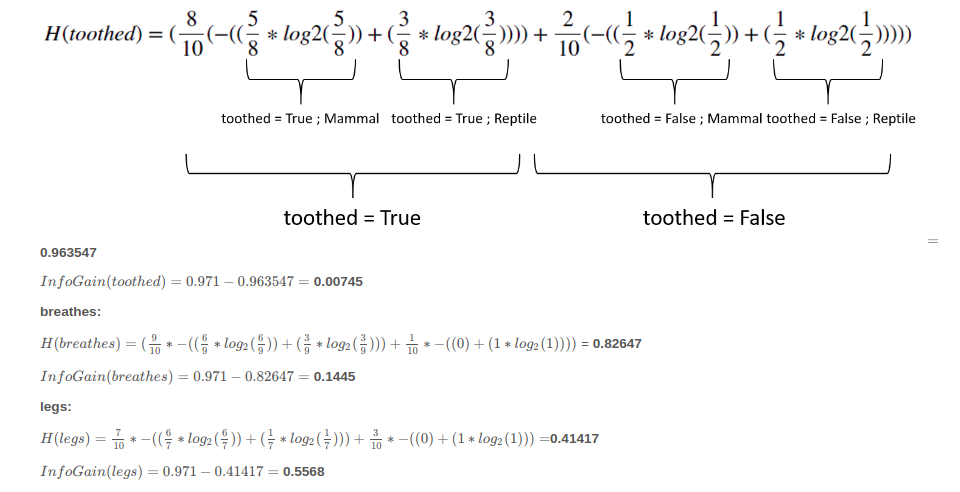


Hence the splitting the dataset along the feature legs results in the largest information gain and we should use this feature for our root node.
Hence for the time being the decision tree model looks like: 

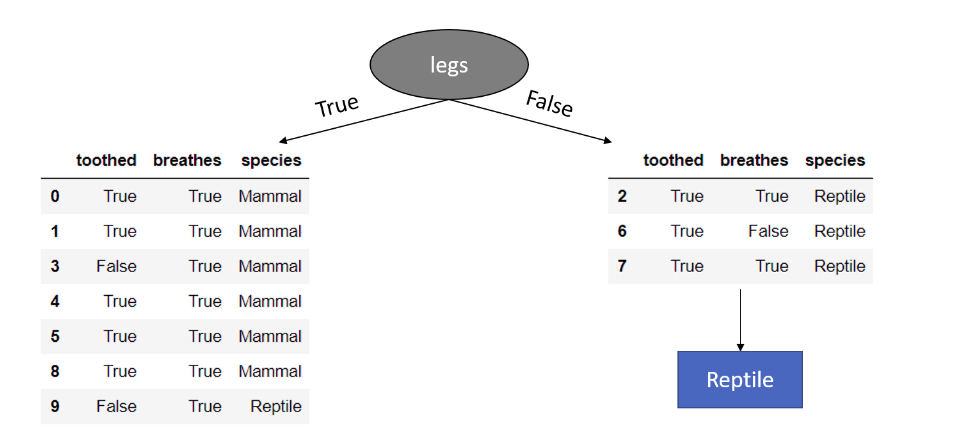


We see that for legs == False, the target feature values of the remaining dataset are all Reptile and hence we set this as leaf node because we have a pure dataset (Further splitting the dataset on any of the remaining two features would not lead to a different or more accurate result since whatever we do after this point, the prediction will remain Reptile). Additionally, you see that the feature legs is no longer included in the remaining datasets. Because we already has used this (categorical) feature to split the dataset on it must not be further used.

Until now we have found the feature for the root node as well as a leaf node for legs == False. The same steps for information gain calculation must now be accomplished also for the remaining dataset for legs == True since here we still have a mixture of different target feature values. Hence:

Information gain calculation for the features toothed and breathes for the remaining dataset legs == True: 

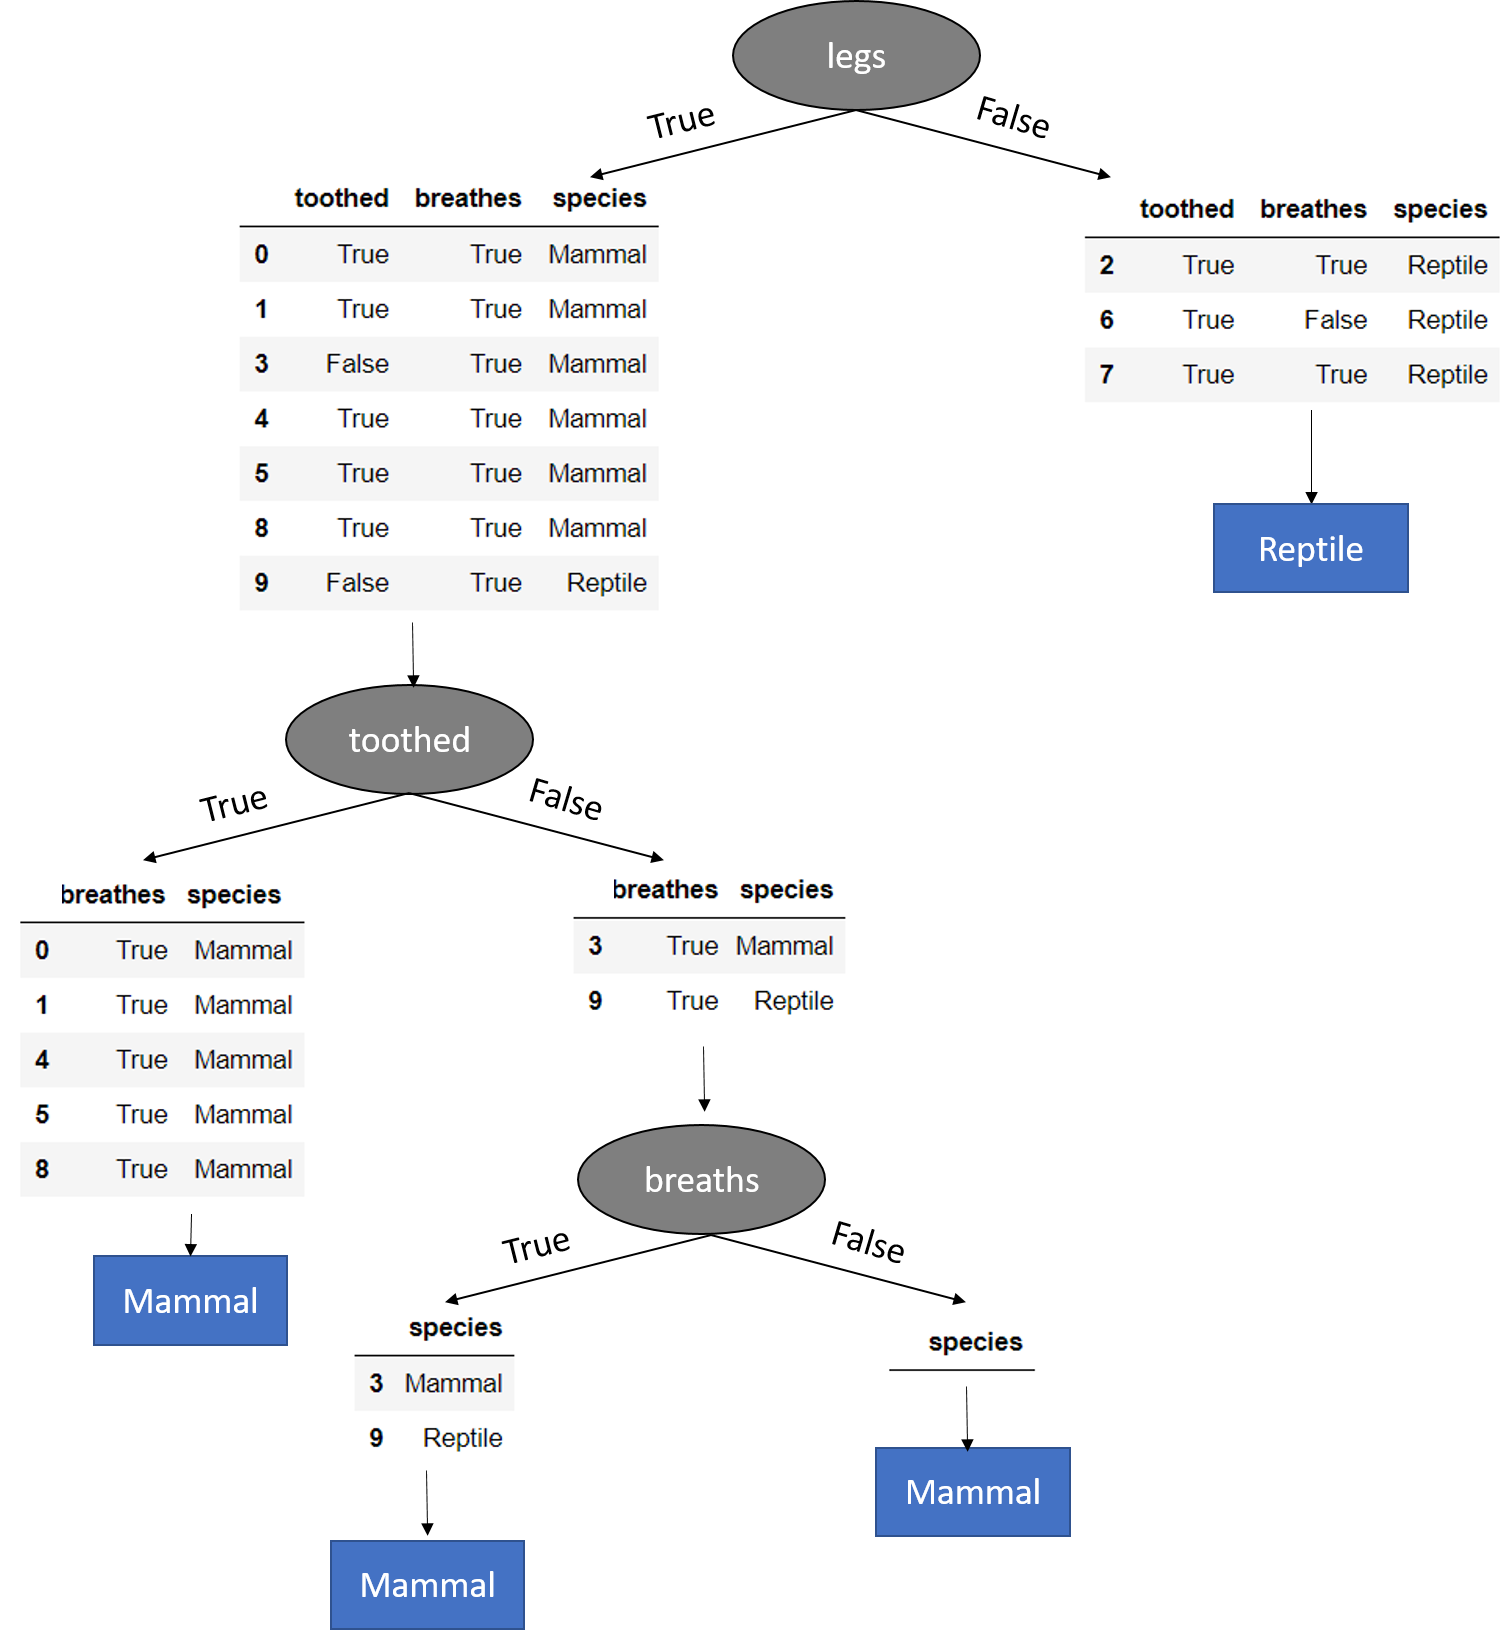

Mind the last split (node) where the dataset got split on the breathes feature. Here the breathes feature solely contains data where breaths == True. Hence for breathes == False there are no instances in the dataset and therewith there is no sub-Dataset which can be built. In that case we return the most frequently occurring target feature value in the original dataset which is Mammal. This is an example how our tree model generalizes behind the training data.
If we consider the other branch, that is breathes == True we know, that after splitting the Dataset on the values of a specific feature (breathes {True,False}) in our case, the feature must be removed. Well, that leads to a dataset where no more features are available to further split the dataset on. Hence we stop growing the tree and return the mode value of the direct parent node which is "Mammal". 

In [11]:
# Decision Tree Classification using sklearn

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Importing the dataset
dataset = pd.read_csv('data_banknote_authentication.csv', header = None)
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
X = dataset[[0,1,2,3]].values
y = dataset.iloc[:, 4].values

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

print ('Accuracy', accuracy_score(y_test, y_pred))
print()
results = confusion_matrix(y_test, y_pred)
print(results)
print()
print ('Report:')
print (classification_report(y_test,y_pred))

Accuracy 0.9854227405247813

[[190   1]
 [  4 148]]

Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       191
           1       0.99      0.97      0.98       152

    accuracy                           0.99       343
   macro avg       0.99      0.98      0.99       343
weighted avg       0.99      0.99      0.99       343

